# The Martos halo seems strange

The potential presented in Allen Santillian is not the same from the mass distribution 

In [34]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt

In [58]:
def martos_mass(r,params):
    # assert that r is a np.ndarray
    assert isinstance(r, np.ndarray)
    M0,rs,rcut,gamma=params
    x=r/rs
    xc = rcut/rs

    inside = x < xc
    outside = x >= xc
    # M0 is the mass at r=0
    M = np.zeros_like(r)
    M[inside] = M0*(x[inside]**gamma) / (1 + x[inside]**(gamma-1))
    M[outside] = M0*(xc**gamma) / (1 + xc**(gamma-1)) 
    return M

def martos_potential(r,params):
    # assert that r is a np.ndarray
    assert isinstance(r, np.ndarray)
    G,M0,rs,rcut,gamma=params
    x=r/rs
    xc = rcut/rs

    inside = x < xc
    outside = x >= xc
    term1= -G*M0/rs
    term2=(1/(gamma-1))*np.log(1+xc**(gamma-1) / (1+x**(gamma-1)))
    term3= xc**(gamma-1) / (1+x**(gamma-1))
    V = term1*(term2 + term3)
    return V


def force(r,params):
    # assert that r is a np.ndarray
    assert isinstance(r, np.ndarray)
    G,M0,rs,rcut,gamma=params
    x=r/rs
    xc = rcut/rs
    inside = x < xc
    outside = x >= xc
    F = np.zeros_like(r)
    F[inside] = -G*M0/(rs**2) * (x[inside]**(gamma-2)) / (1 + x[inside]**(gamma-1))
    F[outside] = -G*M0/(r[outside]**2) * (xc**(gamma)) / (1 + xc**(gamma-1))
    return F

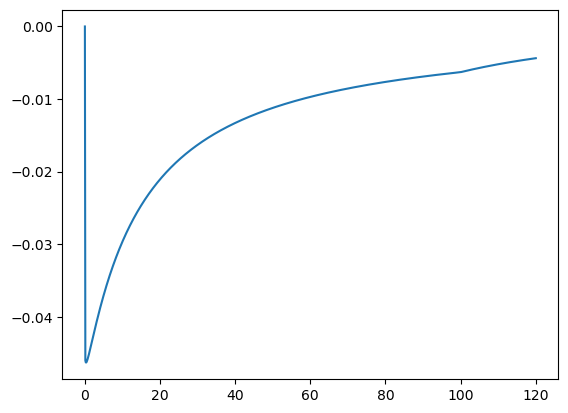

In [61]:
M,rs,rcut,gamma = 10,14,100,2.02
r = np.linspace(0, 120, 1000)
m = martos_mass(r, (M,rs,rcut,gamma))
V = martos_potential(r, (1, M, rs, rcut, gamma))
F = force(r, (1, M, rs, rcut, gamma))
fig, ax = plt.subplots()
ax.plot(r, F)


In [22]:
x,gamma,xcut,xeval = sp.symbols('x gamma x_cut xeval', real=True,positive=True)
# Define the function
xcut=10
m = x**gamma / (1 + x**(gamma-1))
mtot=xcut**gamma / (1 + xcut**(gamma-1))
# make the piecewise function


integrand = m / x**2 

In [29]:
sp.integrate(sp.simplify(integrand), (x, 1, xcut)).expand()

Piecewise((log(10**gamma + 10)/(gamma - 1) - log(10)/(gamma - 1) - log(2)/(gamma - 1), Ne(gamma, 1)), (log(10)/2, True))